
#### **Parte Práctica**: 

Vamos usar los dataset winequality-white y winequality-red. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. **Exploración Inicial**:
   - Visualiza las primeras filas del dataset.
   - Realiza la matriz de correlacion para ver la relación entre las variables numéricas.

In [47]:
# Visualización del dataset y matriz de correlación.

df=pd.read_csv('winequality.csv',sep=';')
df['wine'] = df['wine'].astype('category')
print(df.head())



df.describe()

#Eliminemos valores de string


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine  
0      9.4        5    r  
1      9.8        5    r  
2    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [50]:
## Eliminamos Outliers from two standard deviations away from the mean

In [49]:
mean = df['residual sugar'].mean()
std = df['residual sugar'].std()

# Define the threshold for outliers (two standard deviations)
threshold = 2 * std

# Filter the dataset to remove outliers
filtered_df = df[np.abs(df['residual sugar'] - mean) <= threshold]

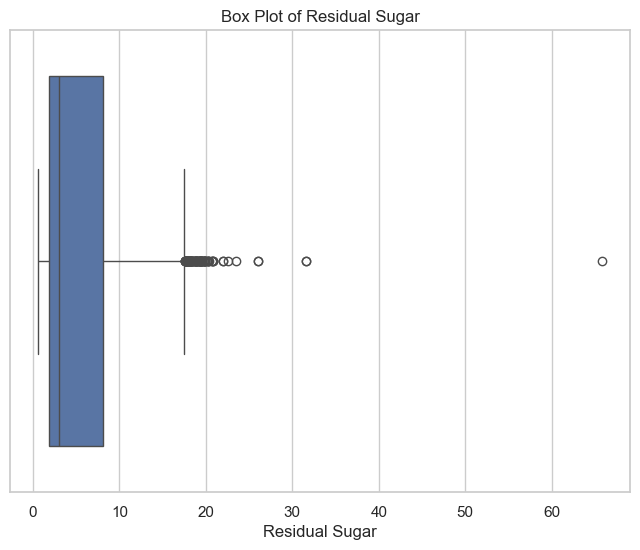

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the "residual sugar" column
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['residual sugar'])

# Set plot labels
plt.title("Box Plot of Residual Sugar")
plt.xlabel("Residual Sugar")

# Show the plot
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine  
0      9.4        5    r  
1      9.8        5    r  
2    

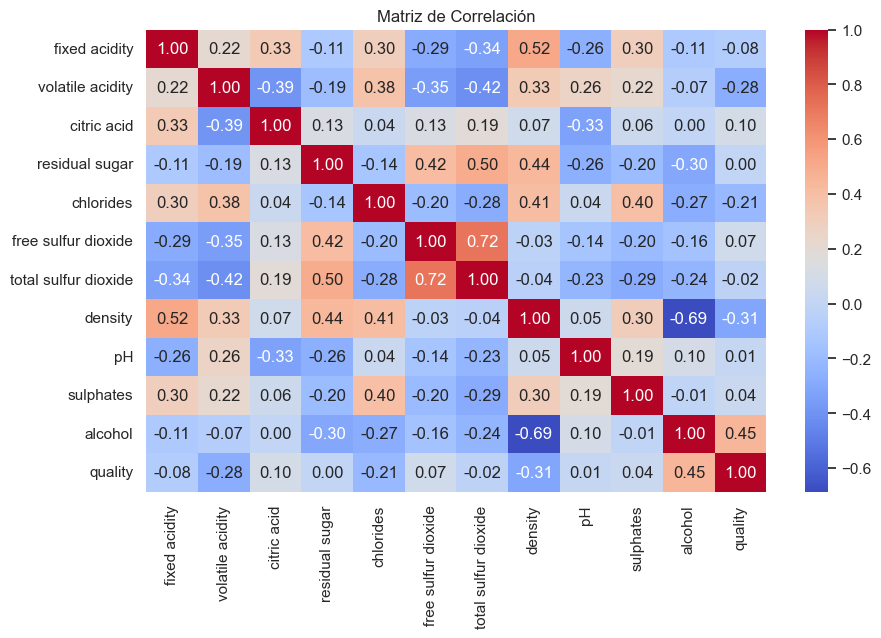

In [51]:
print(df.head())

numerical_df = filtered_df.select_dtypes(include=[float, int])


# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()


# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Crear un mapa de calor para visualizar la matriz de correlación



2. **Modelos Anidados**:
   - Crear un modelo de regresion lineal simple para el dataset de winequality que explique la 'variable density' de solo los vinos rojos.
   - Crear un modelo de regresion multiple para el dataset de winequality que explique la varible 'residual sugar' de solo los vinos blancos.


In [60]:
# Creación del modelo básico con para el dataset winequality.

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

red_wines = filtered_df[filtered_df['wine'] == 'r']

# Define the independent variables and dependent variable
X = red_wines[['alcohol']]  # Replace with the actual columns you want to use
y = red_wines['density']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model_1 = sm.OLS(y, X).fit()

# Print a summary of the model
print(model_1.summary())



                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     515.3
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           4.53e-99
Time:                        21:16:25   Log-Likelihood:                 7987.5
No. Observations:                1596   AIC:                        -1.597e+04
Df Residuals:                    1594   BIC:                        -1.596e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0058      0.000   2514.043      0.0

In [61]:
correlations = numerical_df.corr()['residual sugar'].sort_values(ascending=False)

# Get the top 5 correlations and their corresponding column names
top_correlations = correlations.head(6)  # Including "residual sugar" itself
top_correlations = top_correlations[1:]  # Exclude "residual sugar" from the results

# Display the top 5 correlations and their column names
print("Top 5 correlations with 'residual sugar':")
print(top_correlations)

Top 5 correlations with 'residual sugar':
total sulfur dioxide    0.499316
density                 0.437047
free sulfur dioxide     0.420255
citric acid             0.129996
quality                 0.004174
Name: residual sugar, dtype: float64


In [65]:
white_wines = df[df['wine'] == 'w']

# Define the variables for the multiple linear regression
X = white_wines[['density', 'total sulfur dioxide', 'free sulfur dioxide', 'citric acid', 'quality']]
y = white_wines['residual sugar']

# Add a constant for the intercept
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model_2= sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         residual sugar   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2815.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:18:05   Log-Likelihood:                -11584.
No. Observations:                4898   AIC:                         2.318e+04
Df Residuals:                    4892   BIC:                         2.322e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1564.0794 


3. **Pruebas F Anidadas**:
   - Realiza una prueba F anidada entre los dos modelos.


4. **Variables Categóricas**:
   - Añade la variable extra al modelo propuesto de winequality del modelo de regresión simple y verificar si el se mejora el ajuste.

In [ ]:
# Añadiendo la variable categórica sex al modelo mediante codificación dummy.



5. **Intereacciones**:
   - Añade una interacción entre para el modelo de winequality que explica la variable 'residual sugar'.

In [ ]:
# Añadiendo una interacción entre total_bill y size al modelo.





6. **Pruebas de Bondad de Ajuste**:
   - Compara R-squared, R-square adj y el MSE entre los cuatro modelos.


In [ ]:
# Comparación del R-squared, R-square sdj y el MSE (Error Cuadrático Medio) entre los cuatro modelos.




7. **Análisis de Residuos**:
   - Grafica los residuos frente a los valores ajustados para el último modelo.
   - Realiza un QQ-Plot para verificar la normalidad de los residuos.


In [ ]:
# Gráfica de los residuos frente a los valores ajustados para el último modelo.




In [ ]:
# Realización del QQ-Plot para verificar la normalidad de los residuos.

# Obtener los residuos del modelo




8. **Metodo de selección de variables**:
   - Realice de nuevo el modelo de regresión multiple para ambos casos usando el metodo de busqueda exahustiva.
   - Realice de nuevo el modelo de regresión multiple para ambos casos usando el metodo de busqueda hacia adelante.
   - Realice de nuevo el modelo de regresión multiple para ambos casos usando el metodo de busqueda hacia atras.
   
   


In [ ]:
#